### Desafio StealthAg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Abrindo a imagem

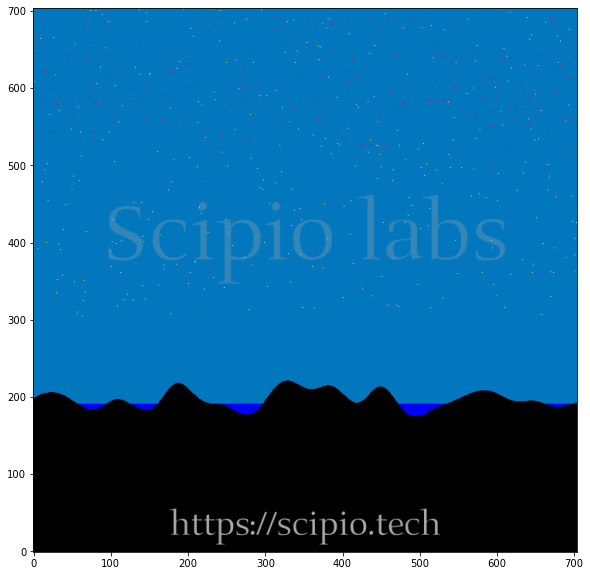

In [2]:
img = cv2.imread(r'meteor_challenge_01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[::-1] # aqui eu faço o flip da imagem para que a origem no gráfico fique no canto inferior
plt.figure(figsize = (10,10))                                                          # esquerdo
plt.imshow(img, origin='lower')

### Contando estrelas e meteoros:

Para fazer a contagem, simplesmente itero sobre todos os pixels e verifico quais são iguais à [255,255,255] para as estrelas e iguais à [255,0,0] para os meteoros. 

Não precisamos nos preocupar com o link "https://scipio.tech" na figura, já que os valores de seus pixels não são iguais aos das estrelas ou dos meteoros. Apesar de aparentarem brancos, não são brancos [255,255,255].

In [3]:
count_white_pixel = 0
for i in range(100):
    for j in range(704):
        if np.all(img[i][j] == np.array([255,255,255])):
            count_white_pixel+=1
count_white_pixel  ## verificando que de fato nenhum pixel de "scipio.tech" é branco [255,255,255]

0

Para manipular as imagens de maneira a não necessitar de dois loops for, eu pego a imagem e faço um .reshape(704*704,3) nela. Isso faz com que o i-ésimo pixel fique na i-ésima posição do array imagem_flat. Essa ideia é interessante quando queremos apenas contar quantos pixels atendem uma certa característica. Quando é de interesse a coordenada de cada pixel, o uso de dois loops for é muito mais natural.

In [4]:
img_flat = img.reshape(704*704,3)
no_stars = 0                  
no_meteors = 0
for i,pixel in enumerate(img_flat):
    if np.all(pixel == np.array([255,255,255])):
        no_stars+=1
    if np.all(pixel == np.array([255,0,0])):
        no_meteors+=1
print(f'Existem {no_stars} estrelas')
print(f'Existem {no_meteors} meteoros')

Existem 315 estrelas
Existem 328 meteoros


Já que os valores dos pixels são bem definidos e nenhum valor de pixel [255,255,255] ou [255,0,0] é observado abaixo do nível do chão, é fácil fazer a contagem das estrelas e dos meteoros. No final desse notebook eu exploro o mesmo problema, mas introduzindo valores de pixel branco e vermelho abaixo do nível do chão.

### Contagem dos meteoros que caem na água:

Para resolver esse problema, basta ver quais meteoros tem sua coordenada x igual à coordenada x de algum pixel de água. Para tal, itero na figura procurando os pixels de água e guardo as coordenadas x de cada um numa lista water_x, jogando fora as coordenadas x repetidas. 

Depois, guardo as coordenadas x de cada meteoro para verificar quais meteoros tem sua coordenada x igual à algum elemento em water_x. Aqueles que caem na água guardo as coordenadas nas listas wet_meteors_x e wet_meteors_y.

In [5]:
water_x = []
for i in range(130,250): # pela figura vejo que os pixels de agua estão nesse intervalo vertical
    for j in range(704):
        if np.all(img[i][j] == np.array([0,0,255])):
            water_x.append(j)
water_x = np.unique(water_x)
water_x ## coordenadas unicas dos pixels de água

array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 473, 474, 475,
       476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
       502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,
       515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 52

In [6]:
meteors_x = []
meteors_y = []
for i in range(200,704): ## olhando para a figura vejo que todos os meteoros estão acima de 200
    for j in range(704):
        if np.all(img[i][j] == np.array([255,0,0])):
            meteors_x.append(j)
            meteors_y.append(i) ## guardando as coordenadas y para uso posterior
len(meteors_y) ## aqui verifico que de fato fiz a contagem certa

328

In [7]:
wet_meteors_x = []
wet_meteors_y = []
for meteor_x,meteor_y in zip(meteors_x,meteors_y):
    if meteor_x in water_x: # verificando quais de fato caem na água
        wet_meteors_x.append(meteor_x)
        wet_meteors_y.append(meteor_y)
wet_meteors_x = np.array(wet_meteors_x)
wet_meteors_y = np.array(wet_meteors_y)
print(f'{len(wet_meteors_x)} meteoros cairão na água')

105 meteoros cairão na água


### Frase escondida:

Não consegui encontrar a frase :( ; mas deixo aqui minhas tentativas. Minha ideia inicial seria criar  3 imagens tais que os únicos pontos não pretos fossem estrelas, meteoros e meteoros que caem na água, respectivamente. Depois de criar essas imagens, tento somá-las para ver se aparece alguma coisa, por exemplo estrelas + meteoros que caem na água.

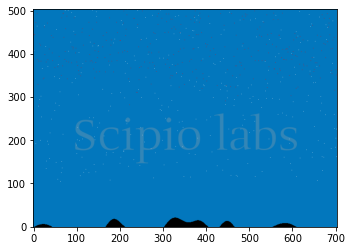

In [8]:
### Imagem apenas com o céu, já que é isso que nos é de interesse.
img_sky_flat = img_flat[704*200:] # como antes, trabalhar com a imagem "flat" é útil
img_sky_reshaped = img_sky_flat.reshape(504,704,3) # fazendo o reshape temos um formato útil para exibição  
plt.imshow(img_sky_reshaped,origin='lower');

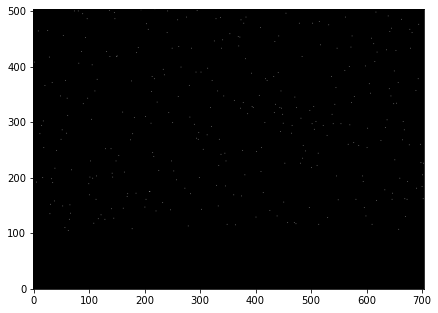

In [9]:
## imagem apenas das estrelas
img_stars = np.copy(img_sky_flat)
for i,pixel in enumerate(img_sky_flat):
    if np.any(pixel != np.array([255,255,255])):
        img_stars[i] = np.array([0,0,0]).astype(np.uint8)
img_stars = img_stars.reshape(504,704,3)
plt.figure(figsize = (7,7))
plt.imshow(img_stars,origin='lower');

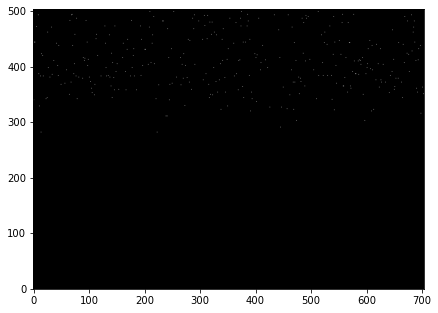

In [10]:
## imagem apenas dos meteoros
img_meteors = np.copy(img_sky_flat)
for i,pixel in enumerate(img_sky_flat):
    if np.any(pixel != np.array([255,0,0])):
        img_meteors[i] = np.array([0,0,0])
    else:
        img_meteors[i] = np.array([255,255,255])
img_meteors = img_meteors.reshape(504,704,3)
plt.figure(figsize = (7,7))
plt.imshow(img_meteors,origin='lower');

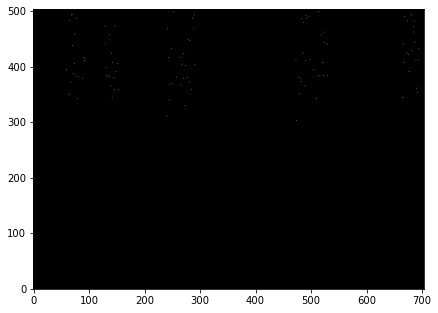

In [11]:
## imagem apenas dos meteoros que caem na água
img_wet_meteors = np.zeros(shape=(504,704,3),dtype=np.uint8)
for i,j in zip(wet_meteors_x,wet_meteors_y - 200):    # o menos 200 aparece pois cortamos parte da
    img_wet_meteors[j][i] = np.array([255,255,255])   # imagem original, que antes tinha tamanho vertical
plt.figure(figsize = (7,7))                           # igual 704
plt.imshow(img_wet_meteors,origin='lower');

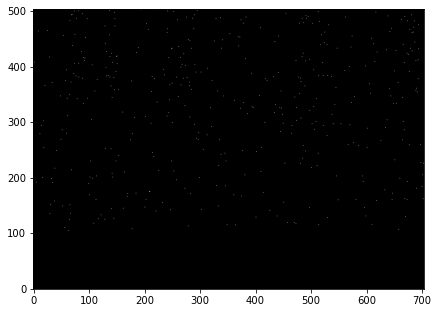

In [12]:
## imagem das estrelas + meteoros que caem na água
plt.figure(figsize=(7,7))
plt.imshow(img_stars + img_wet_meteors,origin='lower');

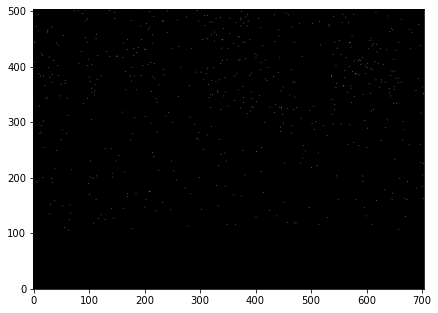

In [13]:
## imagem das estrelas + meteoros que não caem na água
plt.figure(figsize=(7,7))
plt.imshow(img_stars + img_meteors - img_wet_meteors,origin='lower')

Aqui também testo a mesma ideia de antes, mas introduzindo rotações às imagens: para tal isso, precisamos de imagens quadradas, para que rotações mantenham as mesmas dimensões na matriz de pixels. Assim, apenas concateno 200 linhas de pixels pretos às imagens já calculadas.

Testei algumas combinações diferentes de rotações mas nada apareceu, então deixo apenas uma das tentativas como mera ilustração.

In [14]:
## imagens_full são as imagens com formato 704,704 usadas para fazer as rotações
black_lines = np.zeros(shape = (200,704,3),dtype='int')
img_stars_full , img_meteors_full , img_wet_meteors_full = np.concatenate((black_lines,img_stars)),\
np.concatenate((black_lines,img_meteors)),np.concatenate((black_lines,img_wet_meteors))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


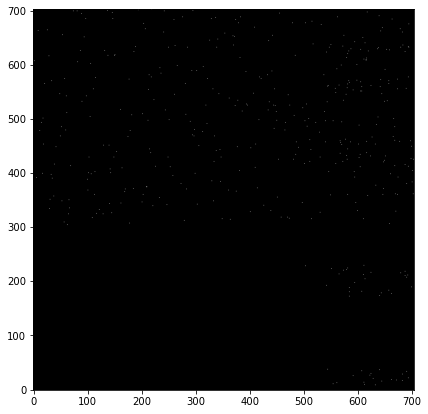

In [15]:
plt.figure(figsize = (7,7))
plt.imshow(img_stars_full \
+ np.rot90(img_wet_meteors_full),origin='lower');

### Contando meteoros e estrelas quando o chão também possui pixels brancos e vermelhos:

Primeiramente vamos montar tal imagem. Para fazer isso, para todos os pixels pretos na imagem original, eu atribuo uma certa probabilidade dele se tornar branco e uma certa probabilidade dele se tornar vermelho.

Uso a função np.random.rand() para gerar valores aleatórios entre 0 e 1. Caso o valor seja menor que 0.01, atribuo o valor branco, caso seja maior que 0.99, vermelho e caso contrário, o pixel se mantém preto.

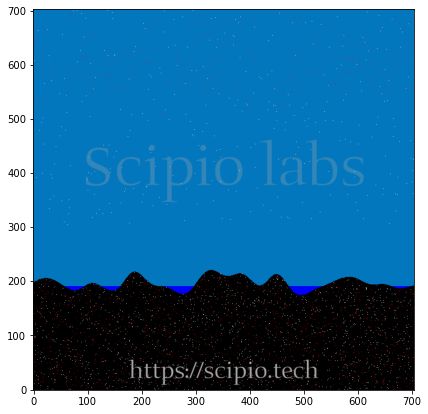

In [16]:
img_harder = np.copy(img_flat)
for i,pixel in enumerate(img_harder):
    if np.all(pixel == np.array([0,0,0])):
        random_number = np.random.rand()
        if random_number < 0.01:
            img_harder[i] = np.array([255,255,255])
        if random_number > 0.99:
            img_harder[i] = np.array([255,0,0])
img_harder = img_harder.reshape(704,704,3)
plt.figure(figsize=(7,7))
plt.imshow(img_harder,origin='lower')

Para contar apenas os pixels brancos e vermelhos acima do chão, precisamos de uma boa definição do que é chão e o que não é. Como nesse problema as estrelas e os meteoros só aparecem no alto do céu, traçar uma linha horizontal perto do chão resolveria o problema, mas vamos fingir que as estrelas e os meteoros estão próximos ao chão e que isso não seria viável.

Assim, vamos traçar o contorno do chão, assim, pontos acima desse contorno serão considerados estrelas ou meteoros e abaixo, ruído. Para fazer isso é bem fácil, para todo pixel de coordenada x entre 0 e 704, somamos 1 à sua altura para verificar se o próximo é um pixel de céu ou não. Caso sim, estamos no contorno, caso não, continuamos somando para achar.

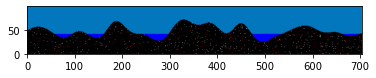

In [17]:
plt.imshow(img_harder[150:250],origin='lower')
## para iterar mais rápido, podemos considerar só um pequeno trecho da imagem; vou ignorar esse fato
## pois iterando na imagem toda ja é rápido suficiente, mas é algo a se pensar caso a resolução da imagem
## seja muito grande

In [18]:
contorno = np.zeros(704)
for j in range(704):
    height = 0
    while True:
        if np.all(img_harder[height][j] == np.array([2,119,189])) \
        or np.all(img_harder[height][j] == np.array([0,0,255])):
            contorno[j] = height - 1
            break
        height+=1

In [19]:
contorno[:50] ## primeiras 50 alturas do contorno

array([198., 199., 199., 200., 200., 201., 201., 202., 202., 203., 203.,
       204., 204., 204., 204., 205., 205., 205., 205., 205., 206., 206.,
       206., 206., 206., 206., 206., 206., 205., 205., 205., 205., 205.,
       204., 204., 204., 203., 203., 202., 202., 202., 201., 201., 200.,
       199., 199., 198., 198., 197., 196.])

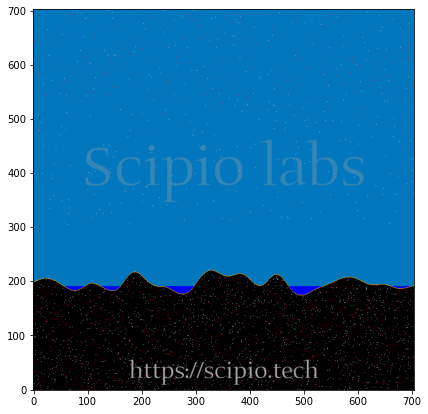

In [20]:
## img_harder com o contorno pintado
img_harder_contornada = np.copy(img_harder)
for j,i in enumerate(contorno):
    img_harder_contornada[int(i)][j] = np.array([255,165,0])
plt.figure(figsize=(7,7))
plt.imshow(img_harder_contornada,origin='lower')
# é um pouco difícil de ver, mas perceba que o contorno do chão está pintado de laranja

Finalmente, para resolver essa versão do problema, basta contar apenas os pontos brancos e vermelhos acima do contorno:

In [21]:
no_stars_harder = 0
no_meteors_harder = 0
for i in range(int(min(contorno)),704): # precisamos procurar apenas a partir da menor altura do contonro
    for j in range(704):
        if np.all(img_harder[i][j] == np.array([255,255,255])):
            if contorno[j] < i:
                no_stars_harder+=1
        if np.all(img_harder[i][j] == np.array([255,0,0])):
            if contorno[j] < i:
                no_meteors_harder+=1
print(f'Existem {no_stars_harder} estrelas !')
print(f'Existem {no_meteors_harder} meteoros !')

Existem 315 estrelas !
Existem 328 meteoros !


## FIM :)